## Question 3: Text-Mining the Bible 

In [1]:
ASV<-read.csv("http://www.webpages.uidaho.edu/~stevel/Datasets/bible_asv.csv",header=TRUE,sep=',')

dim(ASV) 

attach(ASV)


text.Book=c()
for (i in 1:66) {
  text.Book[i]=paste(text[Books==as.character(unique(Books)[i])],collapse = " ")
}

ASV_Books=data.frame(Books=unique(Books),Testaments=as.factor(c(rep("OT",39),rep("NT",27))), 
                     Sections=as.factor(c(rep("Law",5),rep("History",12),rep("Wisdom",5),rep("Prophets",17),rep("Gospels",5),rep("Paul",13),rep("Apostles",9))),
                     text=text.Book)

dim(ASV_Books)    


[1] 31103     8

[1] 66  4

In [2]:
print (ASV$Testaments)

    [1] OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT
   [25] OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT
   [49] OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT
   [73] OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT
   [97] OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT
  [121] OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT
  [145] OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT
  [169] OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT
  [193] OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT
  [217] OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT
  [241] OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT
  [265] OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT OT
  [289] OT OT OT OT OT OT OT OT OT OT OT

In [3]:
attach(ASV)
library(MASS)
library(stringr)
library(devtools)
library(tm)
library(RWeka)
library(SnowballC)

library(RColorBrewer)
install_github("qdapDictionaries", "trinker")
install_github("qdapRegex", "trinker")
install_github("qdapTools", "trinker")
install_github("qdap", "trinker")

The following objects are masked from ASV (pos = 3):

    Books, Chapters, field, Sections, Testaments, text, Verses, X



ERROR: Error in library(devtools): there is no package called ‘devtools’


In [5]:
attach(ASV)
text.Book = c()
text.Book.wc = c()
for (i in 1:66)
    {
    text.Book[i] = paste(text[Books == as.character(unique(Books)[i])], collapse = " ")
    text.Book.wc[i] = sapply((text.Book[i]), length)
}


text.Chapter = c()
text.Chapter.wc = c()
for (i in 1:1189)
    {
    text.Chapter[i] = paste(text[Chapters == as.character(unique(Chapters)[i])], collapse = " ")
    text.Chapter.wc[i] = sapply((text.Chapter[i]), length)
}

Books = c()
for (i in unique(ASV$Books))
    {
    kend = length(unique(ASV[ASV$Books == i, ]$Chapters))
    print (i)
    print (kend)
    Books = c(Books, rep(i, kend))
}


The following object is masked _by_ .GlobalEnv:

    Books

The following objects are masked from ASV (pos = 3):

    Books, Chapters, field, Sections, Testaments, text, Verses, X

The following objects are masked from ASV (pos = 6):

    Books, Chapters, field, Sections, Testaments, text, Verses, X

The following objects are masked from ASV (pos = 7):

    Books, Chapters, field, Sections, Testaments, text, Verses, X



[1] "gen"
[1] 50
[1] "exod"
[1] 40
[1] "lev"
[1] 27
[1] "num"
[1] 36
[1] "deut"
[1] 34
[1] "josh"
[1] 24
[1] "judg"
[1] 21
[1] "ruth"
[1] 4
[1] "1sam"
[1] 31
[1] "2sam"
[1] 24
[1] "1kgs"
[1] 22
[1] "2kgs"
[1] 25
[1] "1chro"
[1] 29
[1] "2chro"
[1] 36
[1] "ezra"
[1] 10
[1] "neh"
[1] 13
[1] "esth"
[1] 10
[1] "job"
[1] 42
[1] "psa"
[1] 150
[1] "prov"
[1] 31
[1] "ecc"
[1] 12
[1] "song"
[1] 8
[1] "isa"
[1] 66
[1] "jer"
[1] 52
[1] "lam"
[1] 5
[1] "ezek"
[1] 48
[1] "dan"
[1] 12
[1] "hosea"
[1] 14
[1] "joel"
[1] 3
[1] "amos"
[1] 9
[1] "obad"
[1] 1
[1] "jonah"
[1] 4
[1] "micah"
[1] 7
[1] "nahum"
[1] 3
[1] "hab"
[1] 3
[1] "zeph"
[1] 3
[1] "hag"
[1] 2
[1] "zech"
[1] 14
[1] "mal"
[1] 4
[1] "matt"
[1] 28
[1] "mark"
[1] 16
[1] "luke"
[1] 24
[1] "john"
[1] 21
[1] "acts"
[1] 28
[1] "rom"
[1] 16
[1] "1cor"
[1] 16
[1] "2cor"
[1] 13
[1] "gal"
[1] 6
[1] "eph"
[1] 6
[1] "phil"
[1] 4
[1] "col"
[1] 4
[1] "1thes"
[1] 5
[1] "2thes"
[1] 3
[1] "1tim"
[1] 6
[1] "2tim"
[1] 4
[1] "tit"
[1] 3
[1] "phile"
[1] 1
[1] "h

In [7]:

print (text.Chapter[1139])

[1] "Wherefore leaving the doctrine of the first principles of Christ, let us press on unto perfection; not laying again a foundation of repentance from dead works, and of faith toward God, of the teaching of baptisms, and of laying on of hands, and of resurrection of the dead, and of eternal judgment. And this will we do, if God permit. For as touching those who were once enlightened and tasted of the heavenly gift, and were made partakers of the Holy Spirit, and tasted the good word of God, and the powers of the age to come, and `then' fell away, it is impossible to renew them again unto repentance; seeing they crucify to themselves the Son of God afresh, and put him to an open shame. For the land which hath drunk the rain that cometh oft upon it, and bringeth forth herbs meet for them for whose sake it is also tilled, receiveth blessing from God: but if it beareth thorns and thistles, it is rejected and nigh unto a curse; whose end is to be burned. But, beloved, we are persuaded bet

In [8]:
ASV_Books = data.frame(Testaments = c(rep('OT', 39), rep('NT', 27)), 
                       Sections = c(rep('Law', 5), rep('History', 12), rep('Wisdom', 5), rep('Prophets', 17), rep('Gospels', 5), rep('Paul', 13), rep('Apostles', 9)),
                       Books = unique(Books), text = text.Book, 
                       wordcount = text.Book.wc)
Testaments = c(rep('OT', 39), rep('NT', 27))
Sections = c(rep('Law', 5), rep('History', 12), rep('Wisdom', 5), rep('Prophets', 17), rep('Gospels', 5), rep('Paul', 13), rep('Apostles', 9))

The file consists of 8 columns (as shown above). The 'text' column contains relevant text that we should take into consideration.

# Frequency of Words

In [9]:
library(tm)
library(ggplot2)
docs <- Corpus(VectorSource(ASV_Books$text))
summary(docs)

ERROR: Error in library(tm): there is no package called ‘tm’


In [10]:
stopwords("english")

ERROR: Error in stopwords("english"): could not find function "stopwords"


Warning message in tm_map.SimpleCorpus(myCorpus, removeWords, mystopwords):
"transformation drops documents"

[1] 2799    2

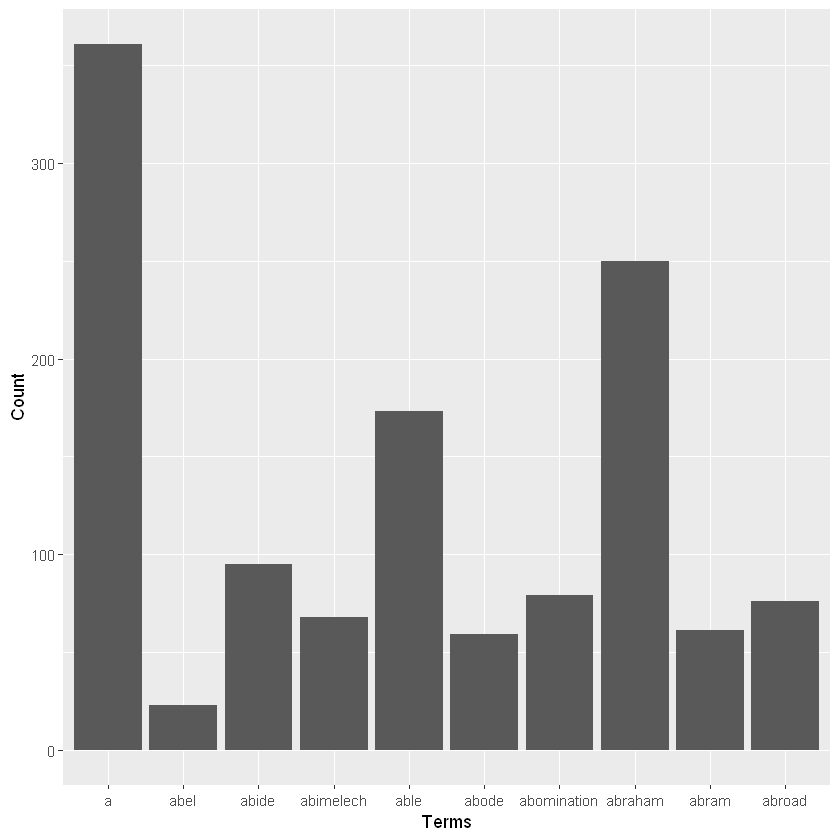

In [9]:
myCorpus <- Corpus(VectorSource(ASV_Books$text))
mystopwords <- c(stopwords('english'), "and", "unto", "shall")
myCorpus <- tm_map(myCorpus, removeWords, mystopwords)
tdm <- TermDocumentMatrix(myCorpus, control = list(wordLengths = c(1, Inf)))
freq.terms <- findFreqTerms(tdm, lowfreq = 15)
term.freq <- rowSums(as.matrix(tdm))
term.freq <- subset(term.freq, term.freq >= 15)
df <- data.frame(term = names(term.freq), freq = term.freq)
dim(df)
ggplot(df[1:10, 1:2], aes(x = term, y = freq)) + geom_bar(stat = "identity") + xlab("Terms") + ylab("Count")
#dtm2 <- removeSparseTerms(v, sparse = 0.95)

In [10]:
docs <- tm_map(docs, removeWords, mystopwords)
dtm <- TermDocumentMatrix(docs)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
head(d, 10)

Warning message in tm_map.SimpleCorpus(docs, removeWords, mystopwords):
"transformation drops documents"

,word,freq
and,and,13707
jehovah,jehovah,6888
thou,thou,5513
thy,thy,4956
will,will,4117
god,god,4112
said,said,3910
thee,thee,3844
upon,upon,2777
man,man,2670


Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, table, tapply, union, unique,
    unsplit, which, which.max, which.min


Attaching package: 'graph'

The following object is masked fro

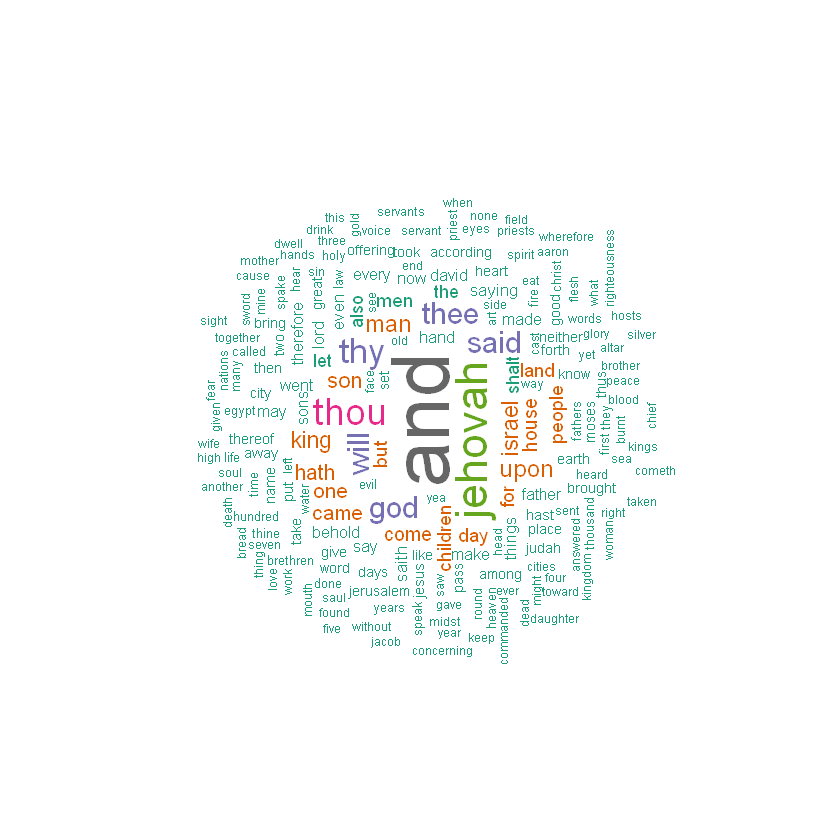

In [11]:
library(graph)
library(Rgraphviz)
library(wordcloud)
wordcloud(words = d$word, freq = d$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

In [12]:
findFreqTerms(dtm, lowfreq = 3)
findAssocs(dtm, terms = "freedom", corlimit = 0.3)

[1] "abated"           "abel"             "abide"           
   [4] "abimelech"        "able"             "abode"           
   [7] "abomination"      "abraham"          "abram"           
  [10] "abroad"           "absent"           "abundantly"      
  [13] "accept"           "accepted"         "according"       
  [16] "account"          "accounted"        "achbor"          
  [19] "adah"             "adam"             "add"             
  [22] "adder"            "admah"            "afar"            
  [25] "afflict"          "affliction"       "afraid"          
  [28] "after"            "afterward"        "afterwards"      
  [31] "age"              "aiah"             "aileth"          
  [34] "alighted"         "alive"            "all"             
  [37] "almighty"         "almond"           "alone"           
  [40] "aloud"            "also"             "altar"           
  [43] "altogether"       "amalek"           "amalekites"      
  [46] "ammon"            "among"            "amorite"         
  [49] "amorites"         "anah"             "and"             
  [52] "angel"            "angels"           "anger"           
  [55] "angry"            "another"          "answer"          
  [58] "answered"         "anything"         "apart"           
  [61] "appear"           "appeared"         "appoint"         
  [64] "appointed"        "aram"             "ararat"          
  [67] "arba"             "archers"          "are"             
  [70] "arioch"           "arise"            "ark"             
  [73] "arms"             "arose"            "arpachshad"      
  [76] "array"            "arrayed"          "art"             
  [79] "ashamed"          "asher"            "ashes"           
  [82] "aside"            "ask"              "asked"           
  [85] "asketh"           "ass"              "assemble"        
  [88] "assembly"         "asses"            "asshur"          
  [91] "assyria"          "attained"         "audience"        
  [94] "aught"            "avenged"          "awaked"          
  [97] "away"             "awoke"            "baal"            
 [100] "back"             "backward"         "bad"             
 [103] "bade"             "bake"             "baked"           
 [106] "baker"            "balm"             "bare"            
 [109] "barren"           "basemath"         "basket"          
 [112] "baskets"          "battle"           "bear"            
 [115] "bearing"          "beast"            "beasts"          
 [118] "beautiful"        "became"           "because"         
 [121] "becher"           "become"           "bed"             
 [124] "beer"             "befall"           "befallen"        
 [127] "beforetime"       "began"            "begat"           
 [130] "beget"            "begin"            "beginning"       
 [133] "beguiled"         "beheld"           "behind"          
 [136] "behold"           "bela"             "believed"        
 [139] "belly"            "belong"           "ben"             
 [142] "beneath"          "benjamin"         "beor"            
 [145] "bereaved"         "beriah"           "besides"         
 [148] "besought"         "best"             "beth"            
 [151] "bethuel"          "better"           "betwixt"         
 [154] "beware"           "beyond"           "bilhah"          
 [157] "bilhan"           "binding"          "bird"            
 [160] "birds"            "birthright"       "bitter"          
 [163] "black"            "blame"            "blameless"       
 [166] "blasted"          "bless"            "blessed"         
 [169] "blesseth"         "blessing"         "blessings"       
 [172] "blindness"        "blood"            "blossoms"        
 [175] "bodies"           "boiled"           "boiling"         
 [178] "bondman"          "bondmen"          "bone"            
 [181] "bones"            "book"             "booths"          
 [184] "border"           "born"             "borne"           
 [187] "bosom"            "both"   

$freedom
      allegory       beggarly        bewitch     compellest       disannul 
          0.90           0.90           0.90           0.90           0.90 
 dissimulation       enmities       envyings       forewarn      freewoman 
          0.90           0.90           0.90           0.90           0.90 
     galatians    gratulation      guardians     jealousies        lusteth 
          0.90           0.90           0.90           0.90           0.90 
        repute        severed           tone          tutor       unsettle 
          0.90           0.90           0.90           0.90           0.90 
  vainglorious      zealously          marks     revellings        reputed 
          0.90           0.90           0.85           0.85           0.80 
         havoc      preacheth   contrariwise        parties     dissembled 
          0.73           0.73           0.68           0.63           0.63 
      imparted      overtaken     travailest      accepteth     foreseeing 
          0.63           0.63           0.63           0.63           0.63 
    persuasion      differeth      leaveneth         wraths        branded 
          0.63           0.63           0.63           0.63           0.63 
       envying       resisted         cephas       mediator     persecuted 
          0.63           0.63           0.62           0.61           0.60 
       zealous       anathema      supplieth      rudiments           reap 
          0.59           0.59           0.59           0.59           0.58 
        arabia      provoking       availeth        hangeth          block 
          0.52           0.50           0.50           0.50           0.50 
     compelled           abba       religion        unknown       factions 
          0.50           0.50           0.50           0.50           0.50 
    traditions     countrymen    communicate   circumcision       stewards 
          0.50           0.50           0.50           0.49           0.47 
     confirmed      entangled         livest       idolatry        sorcery 
          0.44           0.43           0.43           0.43           0.43 
        compel      covenants lasciviousness    apostleship        promise 
          0.43           0.43           0.43           0.43           0.42 
        soweth         gospel    bondservant        bondage     revelation 
          0.42           0.42           0.42           0.40           0.40 
       galatia      justified         longer        running     continueth 
          0.40           0.39           0.37           0.37           0.37 
     deceiveth     especially      intrusted     beforehand          flesh 
          0.37           0.37           0.37           0.36           0.35 
     conferred        thereto        regions     gentleness       hindered 
          0.34           0.33           0.33           0.33           0.33 
          wish    drunkenness    uncleanness          seeds       passions 
          0.33           0.33           0.31           0.31           0.31 
        change    opportunity 
          0.30           0.30

In [13]:
head(d, 11)

,word,freq
and,and,13707
jehovah,jehovah,6888
thou,thou,5513
thy,thy,4956
will,will,4117
god,god,4112
said,said,3910
thee,thee,3844
upon,upon,2777
man,man,2670


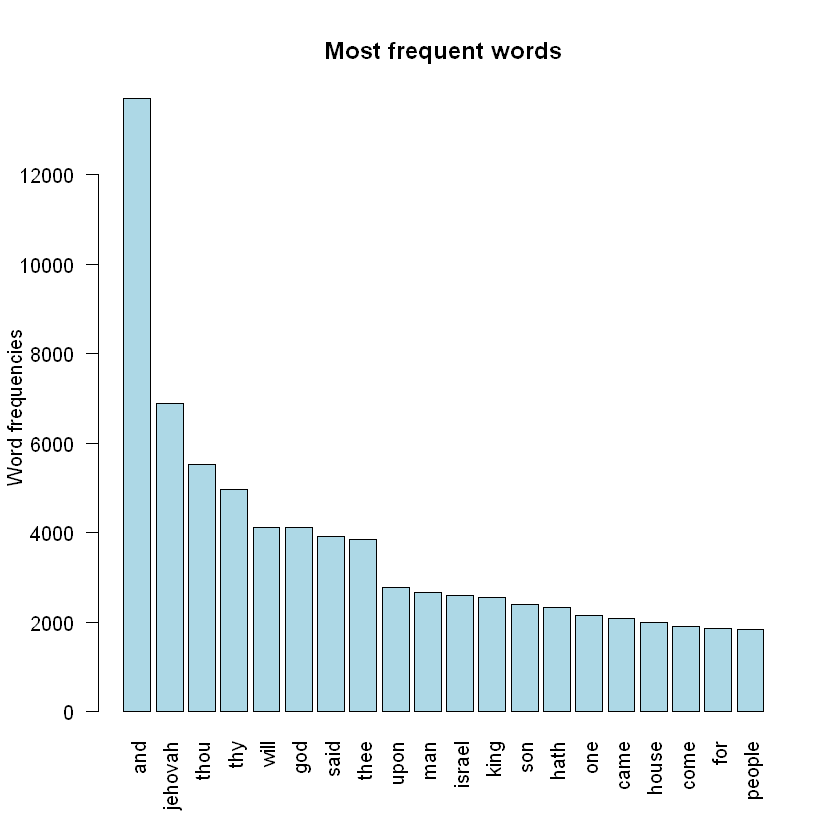

In [14]:
barplot(d[1:20,]$freq, las = 2, names.arg = d[1:20,]$word,
        col ="lightblue", main ="Most frequent words",
        ylab = "Word frequencies")

The "ward" method has been renamed to "ward.D"; note new "ward.D2"


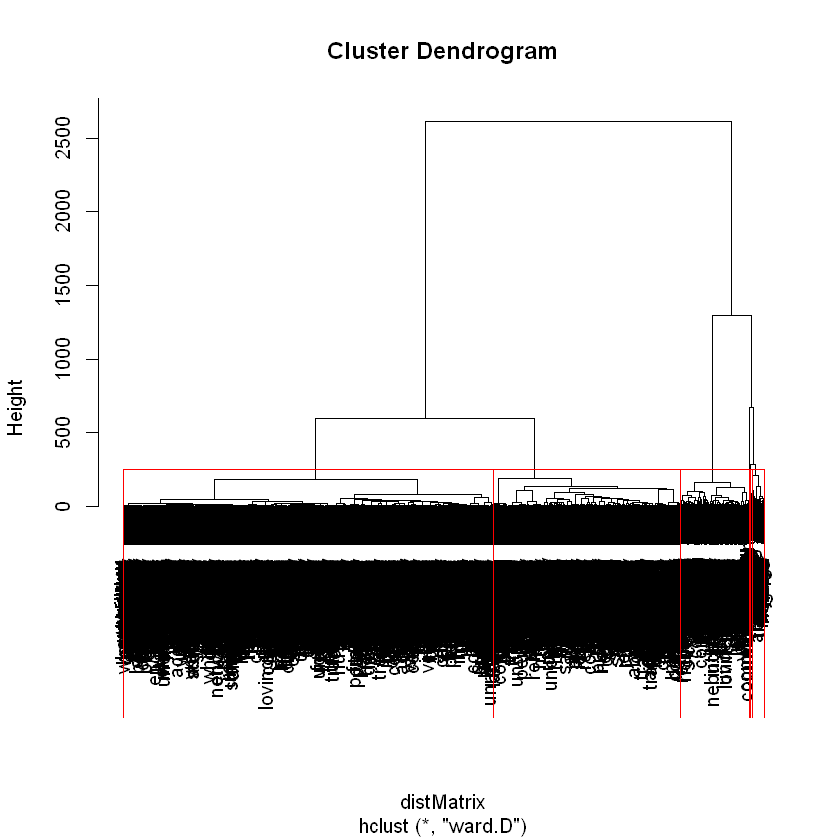

In [15]:
tdm2 <- removeSparseTerms(tdm, sparse = 0.95)
m2 <- as.matrix(tdm2)
distMatrix <- dist(scale(m2))
fit <- hclust(distMatrix, method = "ward")
plot(fit)
rect.hclust(fit, k = 6)

In [16]:
m3 <- t(m2)
k <- 6
kmeansResult <- kmeans(m3, k)
round(kmeansResult$centers, digits = 2)

,a,abated,abel,abide,abimelech,able,abode,abomination,abraham,abroad,...,unbelieving,using,finally,silvanus,sober,supplieth,unfeigned,ensample,richly,fables
1,36.400,0.2,0.000,2.000,0.4,4.400,1.200,5.200,3.400,2.800,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,4.000,2.0,9.000,5.000,24.0,3.000,3.000,2.000,134.000,7.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,1.500,0.2,1.000,1.700,4.2,5.900,2.700,2.400,2.100,2.700,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,13.571,0.0,0.000,1.714,0.0,3.714,0.429,3.286,1.714,0.857,...,1.429,0.143,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,0.676,0.0,0.054,0.568,0.0,0.757,0.054,0.027,0.649,0.135,...,0.054,0.108,0.189,0.108,0.324,0.108,0.108,0.162,0.108,0.135
6,6.667,0.0,0.333,5.000,0.0,5.833,3.000,0.500,7.000,2.833,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [17]:
library("ggplot2")
library("gridExtra")
library(plyr)
library(ROCR)
library(gbm)
library(MASS)
library(e1071)
library(irlba)
library(Matrix)
library(rms)
library(class)
library(factoextra)
library(NbClust)
library(magrittr)
library('fpc')
library('mclust')
library(ngram)
library(dendextend)
library(textmineR)
library(clue)


Attaching package: 'gridExtra'

The following object is masked from 'package:BiocGenerics':

    combine


Attaching package: 'plyr'

The following object is masked from 'package:graph':

    join

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:wordcloud':

    textplot

The following object is masked from 'package:stats':

    lowess

Loaded gbm 2.1.4
Loading required package: Matrix
Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: 'Hmisc'

The following object is masked from 'package:e1071':

    impute

The following objects are masked from 'package:plyr':

    is.discrete, summarize

The following objects are masked from 'package:base':

    format.pval, units

Loading required package: SparseM

Attaching package: 'SparseM'

The following object is masked from 'package:base':

    backsolve

Welcome! Related Books: `

# Collapsing into Books and Chapters

In [18]:
attach(ASV)

text.Book=c()
text.Book.wc=c()
for (i in 1:66) {
  text.Book[i]=paste(text[Books==as.character(unique(Books)[i])],collapse = " ")
  text.Book.wc[i]=wordcount(text.Book[i])
}

text.Chapter=c()
text.Chapter.wc=c()
for (i in 1:1189) {
  text.Chapter[i]=paste(text[Chapters==as.character(unique(Chapters)[i])],collapse = " ")
  text.Chapter.wc[i]=wordcount(text.Chapter[i])
}

Books = c()
for (i in unique(ASV$Books)) {
  kend = length(unique(ASV[ASV$Books==i,]$Chapters))
  #print(i)
  #print(kend)
  Books = c(Books, rep(i, kend))
}


ASV_Chapters=data.frame(Testaments=c(rep('OT',929),rep('NT',260)),
                        Sections=c(rep('Law',187),    rep('History',249),rep('Wisdom',243),rep('Prophets',250),
                                   rep('Gospels',117),rep('Paul',87),rep("Apostles",56)),
                        Books=Books,
                        Chapters=unique(Chapters),text=text.Chapter,
                        wordcount=text.Chapter.wc)

ASV_Books=data.frame(Testaments=c(rep('OT',39),rep('NT',27)),
                        Sections=c(rep('Law',5),    rep('History',12),rep('Wisdom',5),rep('Prophets',17),
                                   rep('Gospels',5),rep('Paul',13),rep("Apostles",9)),
                        Books=unique(Books),text=text.Book,
                        wordcount=text.Book.wc)

#Canonical Groupings 
Testaments=c(rep('OT',39),rep('NT',27))
Sections=c(rep('Law',5),  rep('History',12),rep('Wisdom',5),rep('Prophets',17),
                                   rep('Gospels',5),rep('Paul',13),rep("Apostles",9))


The following objects are masked _by_ .GlobalEnv:

    Books, Sections, Testaments

The following objects are masked from ASV (pos = 34):

    Books, Chapters, field, Sections, Testaments, text, Verses, X

The following objects are masked from ASV (pos = 43):

    Books, Chapters, field, Sections, Testaments, text, Verses, X

The following objects are masked from ASV (pos = 44):

    Books, Chapters, field, Sections, Testaments, text, Verses, X



# Using Term Document Matrix 

In [19]:
my_stopwords1 = c("a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount", "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as", "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the")

my_stopwords2 = c('thou','thee','thy','ye','shall','shalt','lo','unto',
                  'hath', 'thereof', 'hast', 'set', 'thine', 'art', 'yea', 'midst', 
                  'wherefore', 'wilt', 'thyself')
# Turn those sentences into a DTM
dtm.ngrams = vector("list", 3*2*2)
j=1
for (idf_weight in c(FALSE, TRUE)) {
  for (stemfn_name in c("None", "Porter")){
    if (stemfn_name=="Porter"){ stemfn = function(x) SnowballC::wordStem(x, "porter")} else{ stemfn = NULL}
    for (ngram_length in c(1,3,7)) {
      dtm <- CreateDtm(ASV_Books$text, 
                       doc_names = ASV_Books$Books,
                       ngram_window = c(1, ngram_length),
                       stopword_vec = c(tm::stopwords("english"),
                                        tm::stopwords("SMART"),
                                        my_stopwords1, my_stopwords2),
                                        stem_lemma_function = stemfn,
                       lower = TRUE, remove_punctuation = TRUE, remove_numbers = FALSE, verbose=F
                       )
     
      tf <- TermDocFreq(dtm = dtm)
      
      vocabulary <- tf$term[tf$term_freq>2 & tf$doc_freq>1]
      dtm <- dtm[ , vocabulary]
    
      if (idf_weight){
        idf <- log(nrow(dtm) / colSums(dtm > 0))
        tfidf <- t(dtm) * idf
        tfidf <- t(tfidf)
        dtm <-tfidf
      }
      dtm.ngrams[[j]] = dtm
      j = j+1
   
    }
  }
}

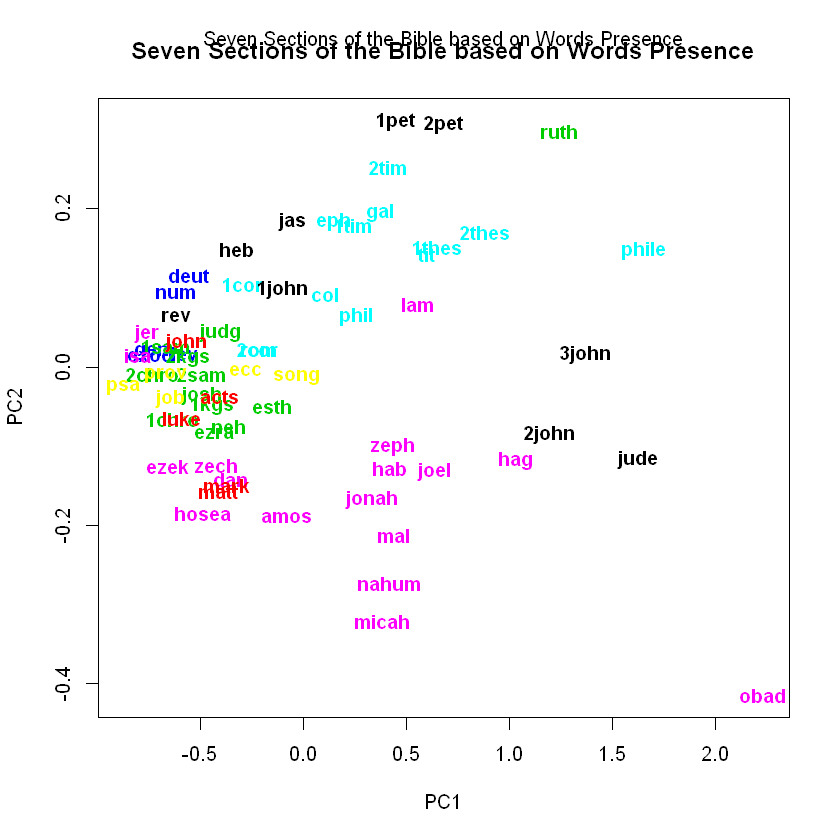

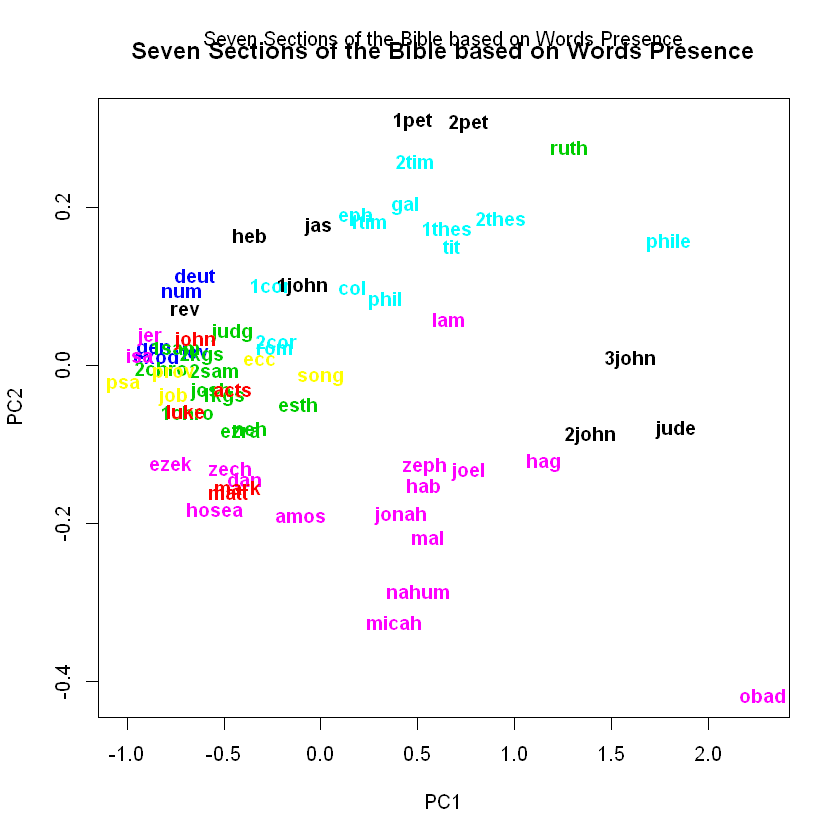

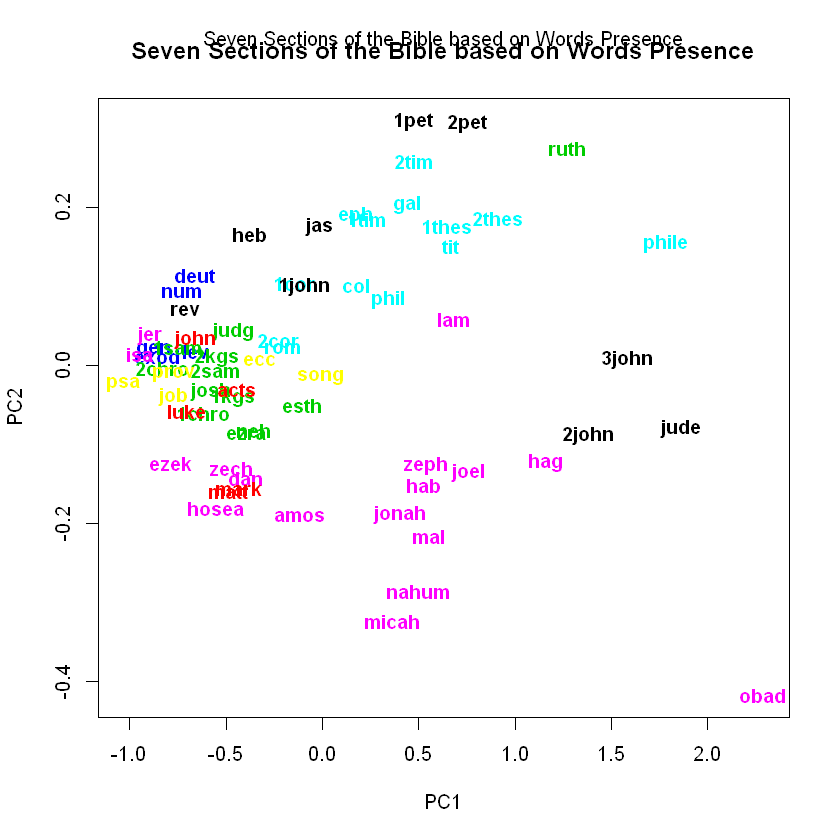

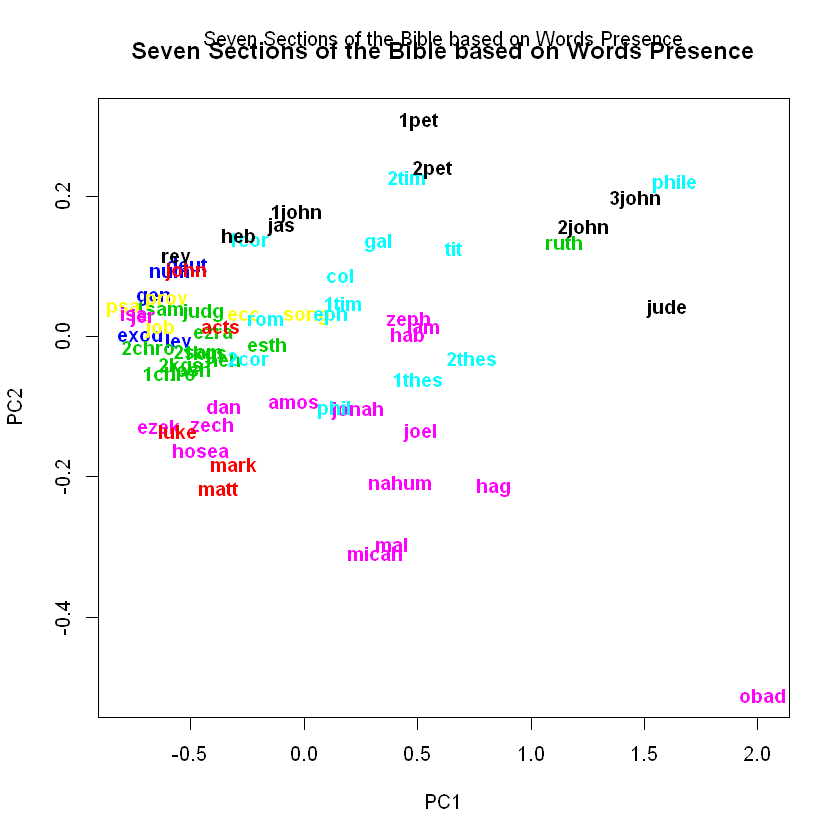

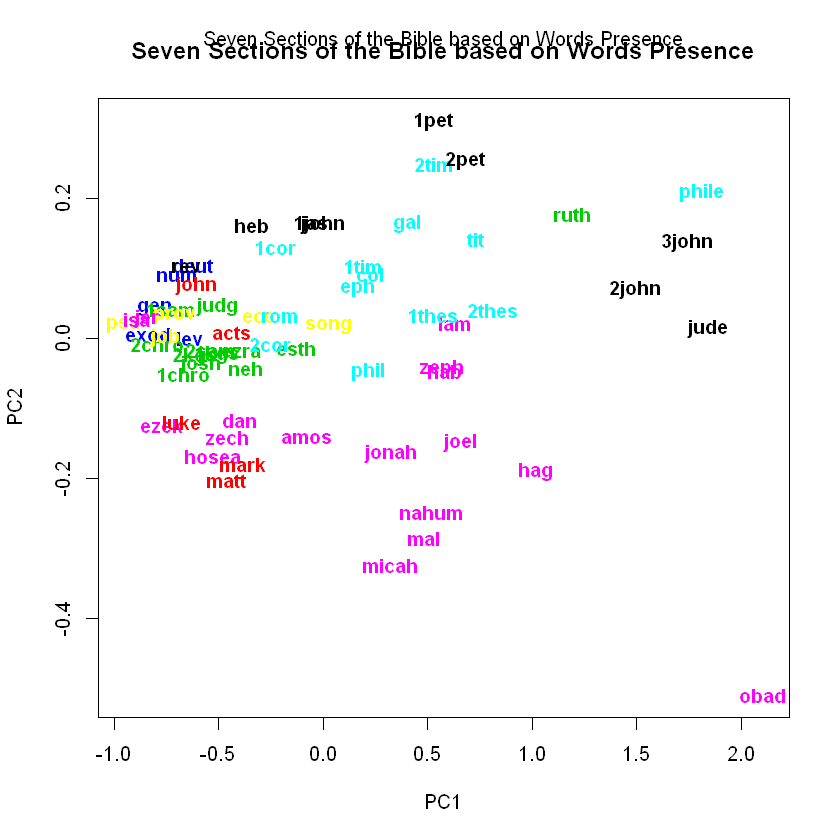

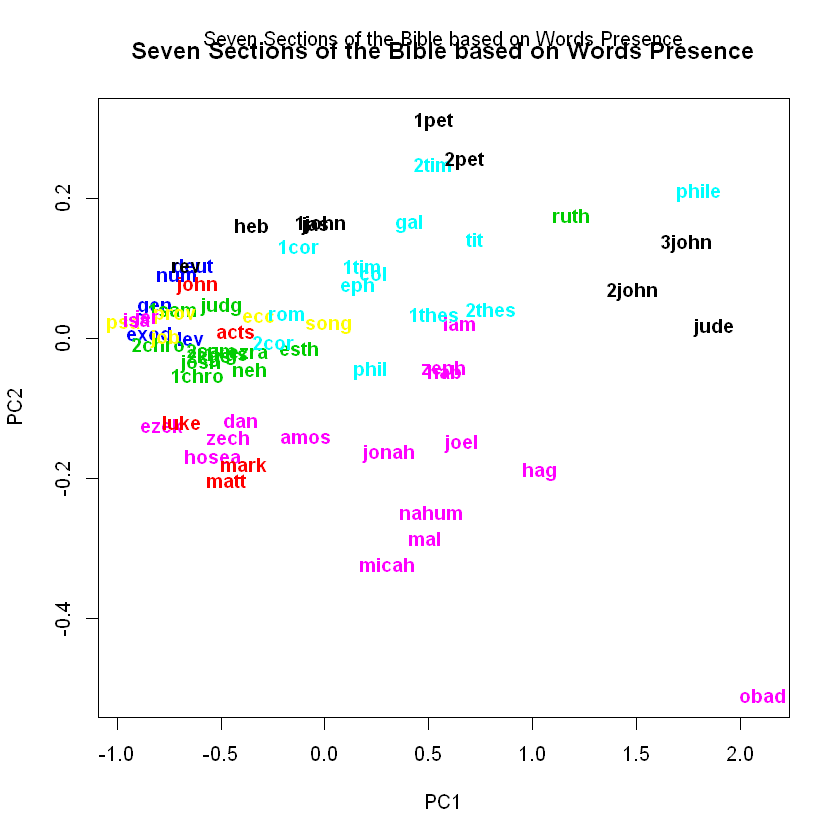

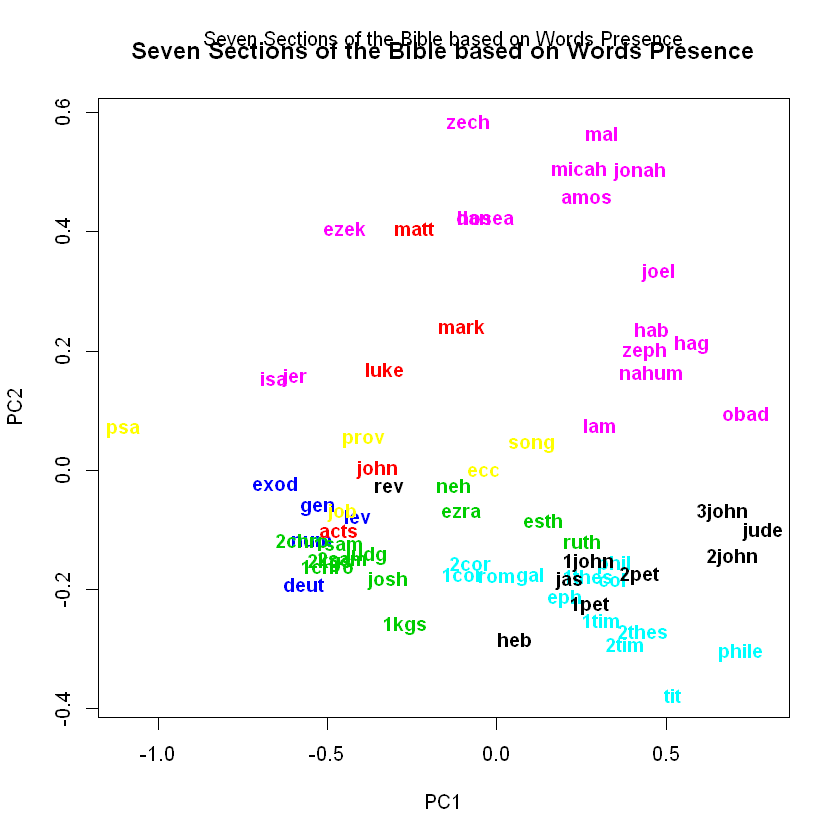

In [20]:
for (i in 1:7){
dtm = dtm.ngrams[[i]]

csim <- dtm / sqrt(rowSums(dtm*dtm))
csim <- csim %*% t(csim)
dist.mtx <- 1-csim

fit.pca <- prcomp(as.dist(dist.mtx))
plot(fit.pca$x[,1:2], type='n',main="Seven Sections of the Bible based on Words Presence")
text(x = fit.pca$x[,1], y = fit.pca$x[,2], labels = row.names(fit.pca$x), col=unclass(as.factor(ASV_Books$Sections)), cex=.95, font=2)
mtext( cex = 1, text = "Seven Sections of the Bible based on Words Presence", 
       line=2,
       outer=FALSE)
}

# Considering n-grams and stemming

In [22]:
j = 1
for (idf_weight in c(FALSE, TRUE)) {
  for (stemfn_name in c("None", "Porter")){
    for (ngram_length in c(1,3,7)) {
    
      dtm = dtm.ngrams[[j]]
      j = j+1
     
      csim <- dtm / sqrt(rowSums(dtm*dtm))
      csim <- csim %*% t(csim)
     
      dist.mtx <- 1-csim
  
    
      hc.avg=hclust(as.dist(dist.mtx),'average')
      
      
      avg.table = table(cutree(hc.avg, k=7), as.numeric(ASV_Books$Sections[hc.avg$order]))
      avg.match = solve_LSAP(x = avg.table, maximum = TRUE)
      avg.sxr = sum(avg.table[cbind(seq_along(avg.match), avg.match)]) / sum(avg.table)
      
      avg.table = table(cutree(hc.avg, k=2), as.numeric(ASV_Books$Testaments[hc.avg$order]))
      avg.match = solve_LSAP(x = avg.table, maximum = TRUE)
      avg.sxrT = sum(avg.table[cbind(seq_along(avg.match), avg.match)]) / sum(avg.table)
      
    
      hc.wald=hclust(as.dist(dist.mtx),'ward.D2')
      
     
      wald.table = table(cutree(hc.wald, k=7), as.numeric(ASV_Books$Sections[hc.wald$order]))
      wald.match = solve_LSAP(x = wald.table, maximum = TRUE)
      wald.sxr = sum(wald.table[cbind(seq_along(wald.match), wald.match)]) / sum(wald.table)
      
      wald.table = table(cutree(hc.wald, k=2), as.numeric(ASV_Books$Testaments[hc.wald$order]))
      wald.match = solve_LSAP(x = wald.table, maximum = TRUE)
      wald.sxrT = sum(wald.table[cbind(seq_along(wald.match), wald.match)]) / sum(wald.table)
      
      cat(sprintf("n-grams: %d    tf-idf: %i    stemming: %s\n", ngram_length, idf_weight, stemfn_name))
      cat(sprintf("Sections:   AVG: %f\tWALD: %f\n", avg.sxr, wald.sxr))
      cat(sprintf("Testaments: AVG: %f\tWALD: %f\n", avg.sxrT, wald.sxrT))
      
       
    }
  }
}

n-grams: 1    tf-idf: 0    stemming: None
Sections:   AVG: 0.318182	WALD: 0.257576
Testaments: AVG: 0.575758	WALD: 0.575758
n-grams: 3    tf-idf: 0    stemming: None
Sections:   AVG: 0.303030	WALD: 0.272727
Testaments: AVG: 0.575758	WALD: 0.575758
n-grams: 7    tf-idf: 0    stemming: None
Sections:   AVG: 0.272727	WALD: 0.257576
Testaments: AVG: 0.575758	WALD: 0.575758
n-grams: 1    tf-idf: 0    stemming: Porter
Sections:   AVG: 0.333333	WALD: 0.287879
Testaments: AVG: 0.606061	WALD: 0.606061
n-grams: 3    tf-idf: 0    stemming: Porter
Sections:   AVG: 0.272727	WALD: 0.303030
Testaments: AVG: 0.575758	WALD: 0.636364
n-grams: 7    tf-idf: 0    stemming: Porter
Sections:   AVG: 0.287879	WALD: 0.287879
Testaments: AVG: 0.575758	WALD: 0.636364
n-grams: 1    tf-idf: 1    stemming: None
Sections:   AVG: 0.348485	WALD: 0.378788
Testaments: AVG: 0.560606	WALD: 0.590909
n-grams: 3    tf-idf: 1    stemming: None
Sections:   AVG: 0.318182	WALD: 0.484848
Testaments: AVG: 0.606061	WALD: 0.621212
n-

In [23]:
dtm <- dtm.ngrams[[3]]
csim <- dtm / sqrt(rowSums(dtm*dtm))
csim <- csim %*% t(csim)

dist.mtx <- 1-csim
hc.avg=hclust(as.dist(dist.mtx),'average')
hc.wald=hclust(as.dist(dist.mtx),'ward.D2')

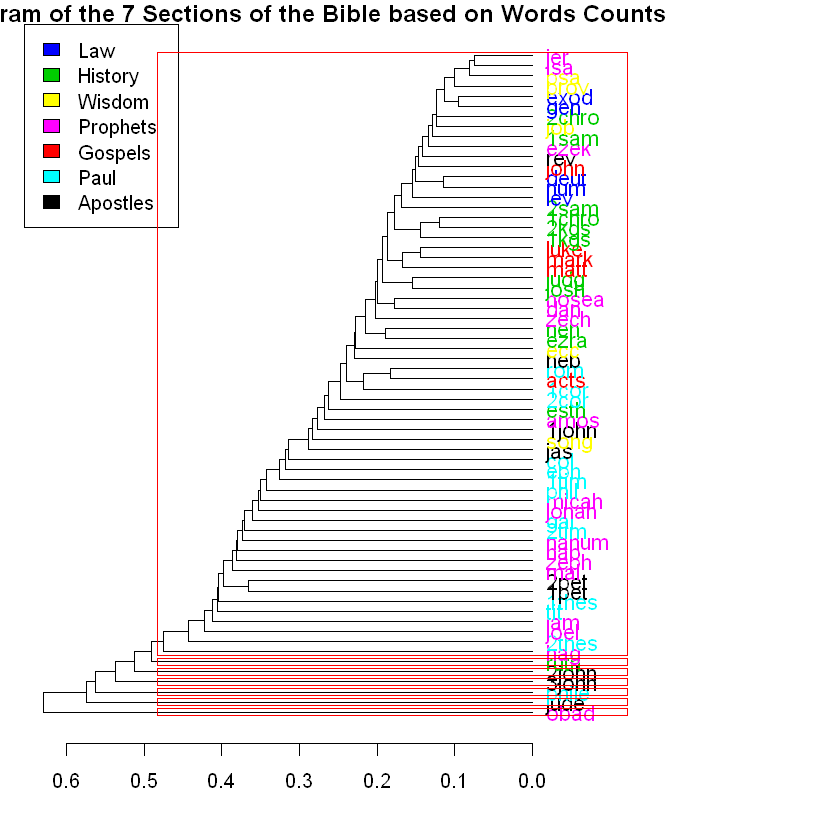

In [24]:
dend=as.dendrogram(hc.avg)

labels_colors(dend) <- as.numeric(as.factor(ASV_Books$Sections[hc.avg$order])) 

dend <- set(dend, "labels_cex", 1.12)
par(mar = c(4,1,1,12))
plot(dend, horiz = TRUE, main='Dendrogram of the 7 Sections of the Bible based on Words Counts ')
legend("topleft", legend = unique(ASV_Books$Sections), fill = as.numeric(as.factor(unique(ASV_Books$Sections))))
rect.dendrogram(dend, k=7, border="red", horiz=T)

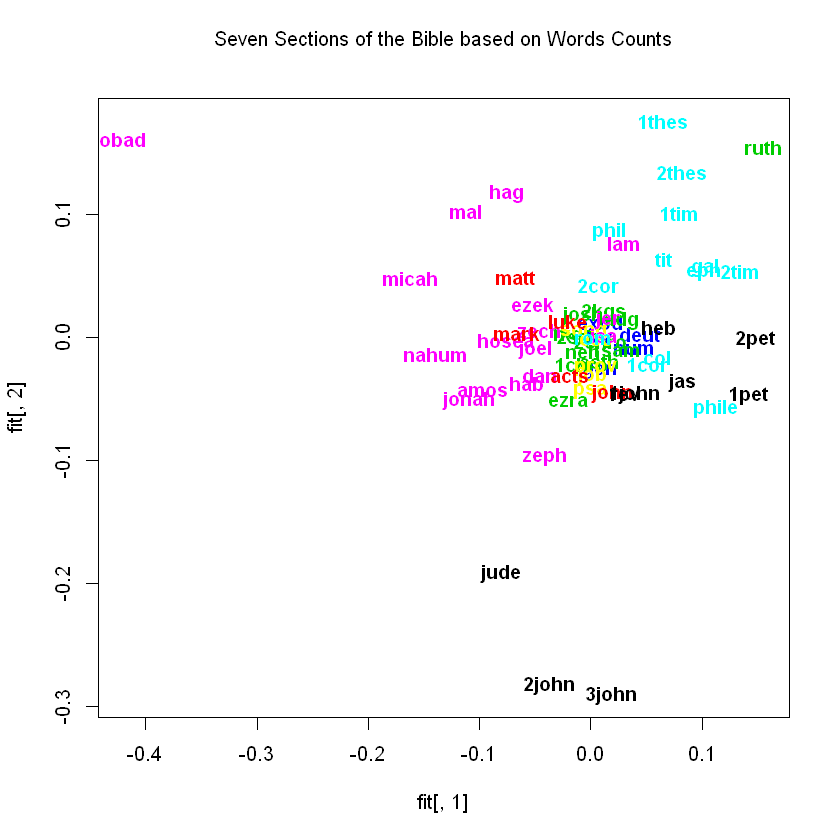

In [25]:

fit <- cmdscale(as.dist(dist.mtx), k = 2)
plot(fit[,2]~fit[,1],type='n')
text(x = fit[,1], y = fit[,2], labels = row.names(fit), col=unclass(as.factor(ASV_Books$Sections)), cex=.95, font=2)
mtext( cex = 1, text = "Seven Sections of the Bible based on Words Counts", 
       line=2,
       outer=FALSE)

# PCA Analysis on the basis of Old and New testament

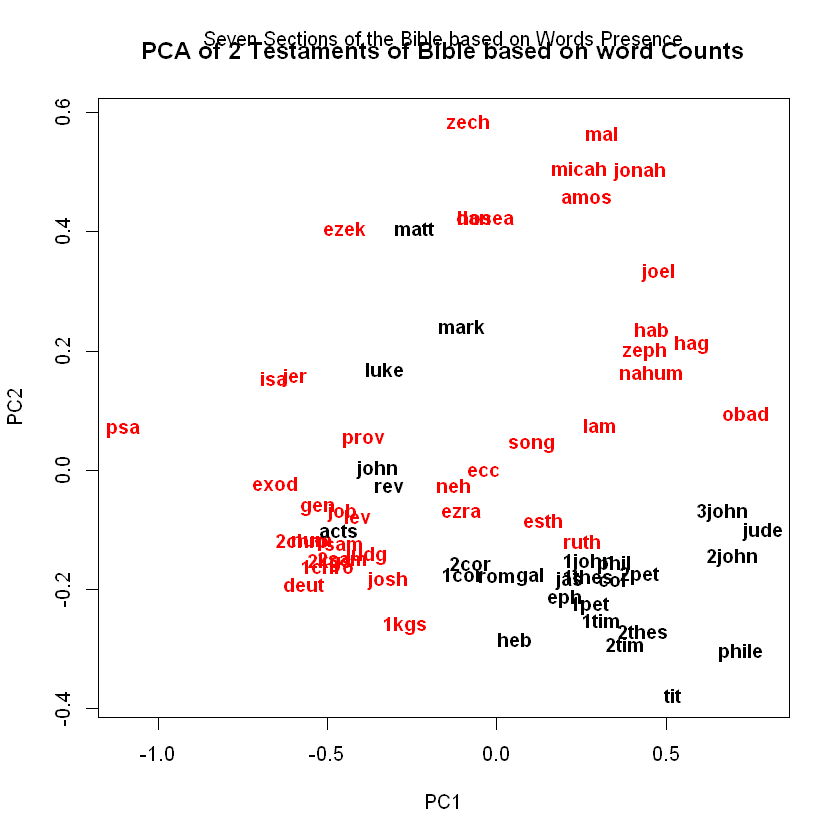

In [26]:

plot(fit.pca$x[,1:2], type='n', main="PCA of 2 Testaments of Bible based on word Counts")
text(x = fit.pca$x[,1], y = fit.pca$x[,2], labels = row.names(fit.pca$x), col=unclass(as.factor(ASV_Books$Testaments)), cex=.95, font=2)
mtext( cex = 1, text = "Seven Sections of the Bible based on Words Presence", 
       line=2,
       outer=FALSE)


In [27]:
j = 1
for (idf_weight in c(FALSE, TRUE)) {
  for (stemfn_name in c("None", "Porter")){
    for (ngram_length in c(1,3,7)) {
    
      dtm = dtm.ngrams[[j]]
      j = j+1
      
      dtm1<-dtm
      dtm1[dtm1>1] <- 1
      csim <- dtm1 / sqrt(rowSums(dtm1*dtm1))
      csim <- csim %*% t(csim)
      
      dist.mtx1 <- 1-csim
  
     
      hc.avg1=hclust(as.dist(dist.mtx1),'average')
      
      # Calculate success rate
      avg.table = table(cutree(hc.avg1, k=7), as.numeric(ASV_Books$Sections[hc.avg1$order]))
      avg.match = solve_LSAP(x = avg.table, maximum = TRUE)
      avg.sxr = sum(avg.table[cbind(seq_along(avg.match), avg.match)]) / sum(avg.table)
      
      avg.table = table(cutree(hc.avg1, k=2), as.numeric(ASV_Books$Testaments[hc.avg1$order]))
      avg.match = solve_LSAP(x = avg.table, maximum = TRUE)
      avg.sxrT = sum(avg.table[cbind(seq_along(avg.match), avg.match)]) / sum(avg.table)
      
      
      hc.wald1=hclust(as.dist(dist.mtx1),'ward.D2')
      
      # Calculate success rate
      wald.table = table(cutree(hc.wald1, k=7), as.numeric(ASV_Books$Sections[hc.wald1$order]))
      wald.match = solve_LSAP(x = wald.table, maximum = TRUE)
      wald.sxr = sum(wald.table[cbind(seq_along(wald.match), wald.match)]) / sum(wald.table)
      
      wald.table = table(cutree(hc.wald1, k=2), as.numeric(ASV_Books$Testaments[hc.wald1$order]))
      wald.match = solve_LSAP(x = wald.table, maximum = TRUE)
      wald.sxrT = sum(wald.table[cbind(seq_along(wald.match), wald.match)]) / sum(wald.table)
      
      cat(sprintf("n-grams: %d    tf-idf: %i    stemming: %s\n", ngram_length, idf_weight, stemfn_name))
      cat(sprintf("Sections:   AVG: %f\tWALD: %f\n", avg.sxr, wald.sxr))
      cat(sprintf("Testaments: AVG: %f\tWALD: %f\n", avg.sxrT, wald.sxrT))
      
    
    }
  }
}

n-grams: 1    tf-idf: 0    stemming: None
Sections:   AVG: 0.303030	WALD: 0.409091
Testaments: AVG: 0.575758	WALD: 0.696970
n-grams: 3    tf-idf: 0    stemming: None
Sections:   AVG: 0.318182	WALD: 0.439394
Testaments: AVG: 0.545455	WALD: 0.712121
n-grams: 7    tf-idf: 0    stemming: None
Sections:   AVG: 0.318182	WALD: 0.454545
Testaments: AVG: 0.606061	WALD: 0.803030
n-grams: 1    tf-idf: 0    stemming: Porter
Sections:   AVG: 0.287879	WALD: 0.318182
Testaments: AVG: 0.575758	WALD: 0.666667
n-grams: 3    tf-idf: 0    stemming: Porter
Sections:   AVG: 0.242424	WALD: 0.409091
Testaments: AVG: 0.545455	WALD: 0.696970
n-grams: 7    tf-idf: 0    stemming: Porter
Sections:   AVG: 0.272727	WALD: 0.363636
Testaments: AVG: 0.606061	WALD: 0.742424
n-grams: 1    tf-idf: 1    stemming: None
Sections:   AVG: 0.303030	WALD: 0.333333
Testaments: AVG: 0.590909	WALD: 0.651515
n-grams: 3    tf-idf: 1    stemming: None
Sections:   AVG: 0.272727	WALD: 0.409091
Testaments: AVG: 0.575758	WALD: 0.530303
n-

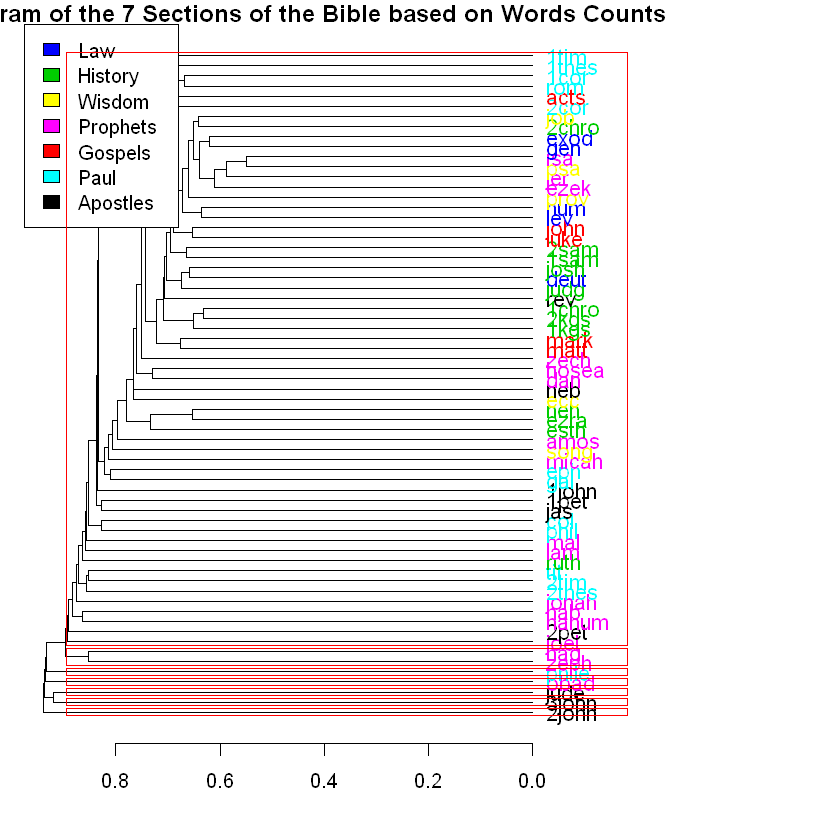

In [28]:
dend=as.dendrogram(hc.avg1)

labels_colors(dend) <- as.numeric(as.factor(ASV_Books$Sections[hc.avg1$order])) 
#Change labels font size
dend <- set(dend, "labels_cex", 1.12)
par(mar = c(4,1,1,12))
plot(dend, horiz = TRUE, main='Dendrogram of the 7 Sections of the Bible based on Words Counts ')
legend("topleft", legend = unique(ASV_Books$Sections), fill = as.numeric(as.factor(unique(ASV_Books$Sections))))
rect.dendrogram(dend, k=7, border="red", horiz=T) 

# K-Means

In [29]:
j = 1
for (idf_weight in c(FALSE, TRUE)) {
  for (stemfn_name in c("None", "Porter")){
    for (ngram_length in c(1,3,7)) {
    
      dtm = dtm.ngrams[[j]]
      j = j+1
  
      
      
      
      csim <- dtm / sqrt(rowSums(dtm*dtm))
      csim <- csim %*% t(csim)
      
      dist.mtx <- 1-csim
    
      set.seed(1234)
      km=kmeans(as.dist(dist.mtx), 7)
      kmT=kmeans(as.dist(dist.mtx), 2)
      
      # Calculate success rate
      km.table = table(km$cluster, as.numeric(ASV_Books$Sections))
      km.match = solve_LSAP(x = km.table, maximum = TRUE)
      km.sxr = sum(km.table[cbind(seq_along(km.match), km.match)]) / sum(km.table)
      
      kmT.table = table(kmT$cluster, as.numeric(ASV_Books$Testaments))
      kmT.match = solve_LSAP(x = kmT.table, maximum = TRUE)
      kmT.sxr = sum(kmT.table[cbind(seq_along(kmT.match), kmT.match)]) / sum(kmT.table)
      
      cat(sprintf("n-grams: %d    tf-idf: %i    stemming: %s\n", ngram_length, idf_weight, stemfn_name))
      cat(sprintf("Sections:   kmeans: %f\n", km.sxr))
      cat(sprintf("Testaments: kmeans: %f\n", kmT.sxr))
    }
  }
}

n-grams: 1    tf-idf: 0    stemming: None
Sections:   kmeans: 0.439394
Testaments: kmeans: 0.621212
n-grams: 3    tf-idf: 0    stemming: None
Sections:   kmeans: 0.500000
Testaments: kmeans: 0.651515
n-grams: 7    tf-idf: 0    stemming: None
Sections:   kmeans: 0.515152
Testaments: kmeans: 0.651515
n-grams: 1    tf-idf: 0    stemming: Porter
Sections:   kmeans: 0.484848
Testaments: kmeans: 0.590909
n-grams: 3    tf-idf: 0    stemming: Porter
Sections:   kmeans: 0.469697
Testaments: kmeans: 0.651515
n-grams: 7    tf-idf: 0    stemming: Porter
Sections:   kmeans: 0.515152
Testaments: kmeans: 0.651515
n-grams: 1    tf-idf: 1    stemming: None
Sections:   kmeans: 0.545455
Testaments: kmeans: 0.651515
n-grams: 3    tf-idf: 1    stemming: None
Sections:   kmeans: 0.545455
Testaments: kmeans: 0.636364
n-grams: 7    tf-idf: 1    stemming: None
Sections:   kmeans: 0.575758
Testaments: kmeans: 0.666667
n-grams: 1    tf-idf: 1    stemming: Porter
Sections:   kmeans: 0.545455
Testaments: kmeans: 0

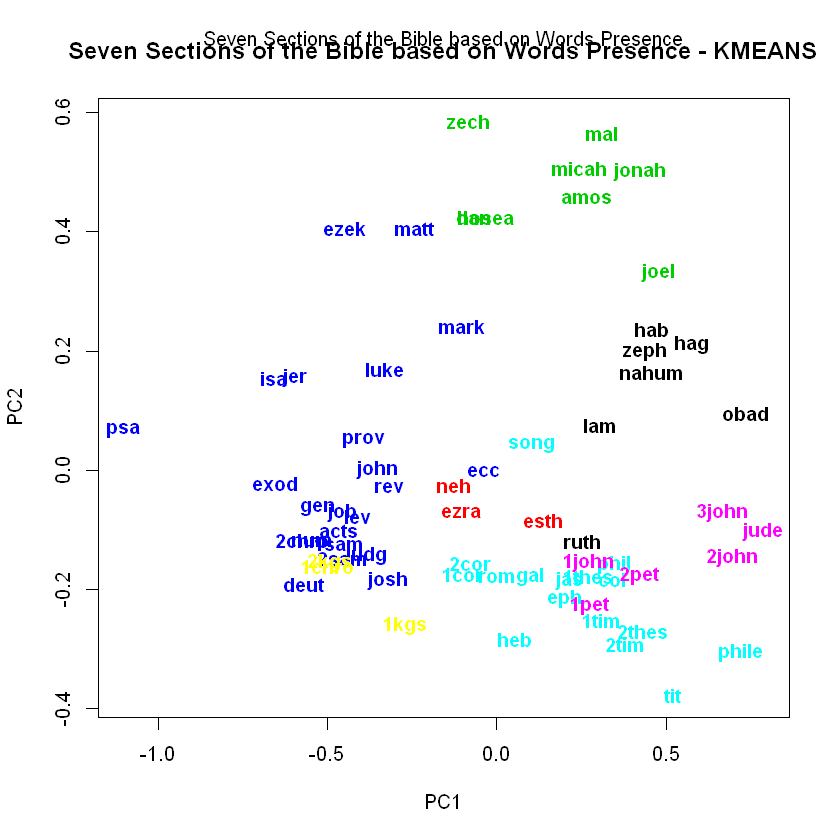

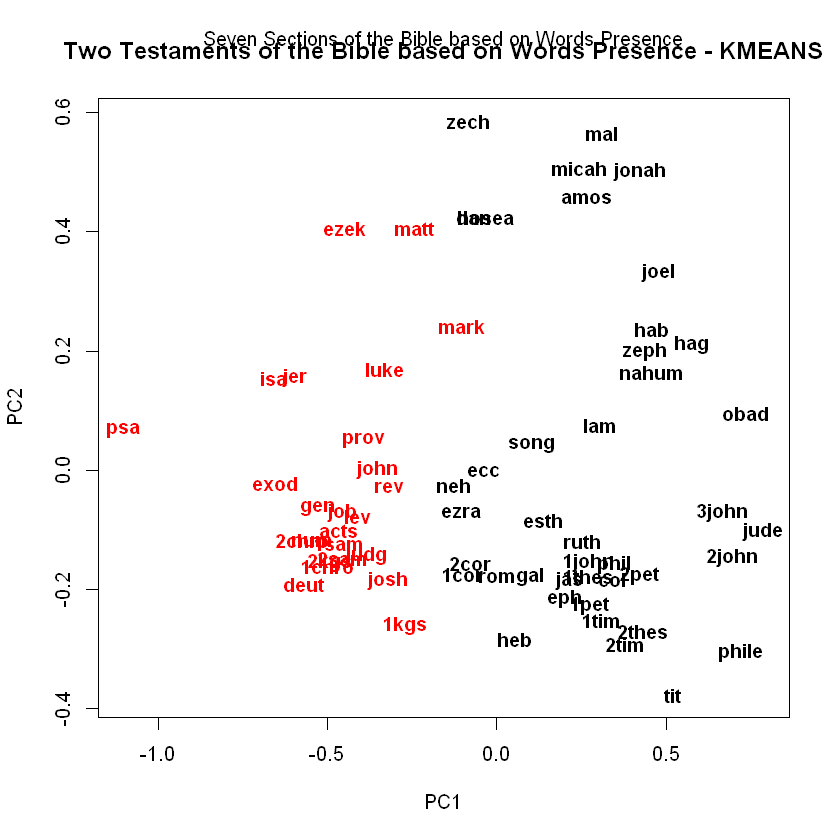

In [30]:
dtm = dtm.ngrams[[7]]

csim <- dtm / sqrt(rowSums(dtm*dtm))
csim <- csim %*% t(csim)

dist.mtx <- 1-csim

#PCA plot
fit.pca <- prcomp(as.dist(dist.mtx))
plot(fit.pca$x[,1:2], type='n',main="Seven Sections of the Bible based on Words Presence - KMEANS")
text(x = fit.pca$x[,1], y = fit.pca$x[,2], labels = row.names(fit.pca$x), col=unclass(as.factor(km$cluster)), cex=.95, font=2)
mtext( cex = 1, text = "Seven Sections of the Bible based on Words Presence", 
       line=2,
       outer=FALSE)

#PCA plot
fit.pca <- prcomp(as.dist(dist.mtx))
plot(fit.pca$x[,1:2], type='n',main="Two Testaments of the Bible based on Words Presence - KMEANS")
text(x = fit.pca$x[,1], y = fit.pca$x[,2], labels = row.names(fit.pca$x), col=unclass(as.factor(kmT$cluster)), cex=.95, font=2)
mtext( cex = 1, text = "Seven Sections of the Bible based on Words Presence", 
       line=2,
       outer=FALSE)

# Fuzzy K-Means

In [31]:
km.sxr.best = 0
kmT.sxr.best = 0
j = 1
for (idf_weight in c(FALSE, TRUE)) {
  for (stemfn_name in c("None", "Porter")){
    for (ngram_length in c(1,3,7)) {
    
      dtm = dtm.ngrams[[j]]
      j = j+1
  
      
      
      
      csim <- dtm / sqrt(rowSums(dtm*dtm))
      csim <- csim %*% t(csim)
      # Turn that cosine similarity matrix into a distance matrix
      dist.mtx <- 1-csim
    
      set.seed(1234)
      km=cmeans(as.dist(dist.mtx), 7, m=2, method="cmeans")
      kmT=cmeans(as.dist(dist.mtx), 2, m=2, method="cmeans")

      # Calculate success rate
      km.table = table(km$cluster, as.numeric(ASV_Books$Sections))
      km.match = solve_LSAP(x = km.table, maximum = TRUE)
      km.sxr = sum(km.table[cbind(seq_along(km.match), km.match)]) / sum(km.table)
      if (km.sxr > km.sxr.best) {
        km.sxr.best = km.sxr
        km.best = km
        km.j = j-1
      }
      
      kmT.table = table(kmT$cluster, as.numeric(ASV_Books$Testaments))
      kmT.match = solve_LSAP(x = kmT.table, maximum = TRUE)
      kmT.sxr = sum(kmT.table[cbind(seq_along(kmT.match), kmT.match)]) / sum(kmT.table)
      if (kmT.sxr > kmT.sxr.best) {
        kmT.sxr.best = kmT.sxr
        kmT.best = kmT
        kmT.j = j-1
      }
      
      cat(sprintf("n-grams: %d    tf-idf: %i    stemming: %s\n", ngram_length, idf_weight, stemfn_name))
      cat(sprintf("Sections:   cmeans: %f\n", km.sxr))
      cat(sprintf("Testaments: cmeans: %f\n", kmT.sxr))
    }
  }
}

n-grams: 1    tf-idf: 0    stemming: None
Sections:   cmeans: 0.409091
Testaments: cmeans: 0.621212
n-grams: 3    tf-idf: 0    stemming: None
Sections:   cmeans: 0.393939
Testaments: cmeans: 0.636364
n-grams: 7    tf-idf: 0    stemming: None
Sections:   cmeans: 0.409091
Testaments: cmeans: 0.651515
n-grams: 1    tf-idf: 0    stemming: Porter
Sections:   cmeans: 0.378788
Testaments: cmeans: 0.621212
n-grams: 3    tf-idf: 0    stemming: Porter
Sections:   cmeans: 0.378788
Testaments: cmeans: 0.651515
n-grams: 7    tf-idf: 0    stemming: Porter
Sections:   cmeans: 0.393939
Testaments: cmeans: 0.651515
n-grams: 1    tf-idf: 1    stemming: None
Sections:   cmeans: 0.318182
Testaments: cmeans: 0.651515
n-grams: 3    tf-idf: 1    stemming: None
Sections:   cmeans: 0.318182
Testaments: cmeans: 0.666667
n-grams: 7    tf-idf: 1    stemming: None
Sections:   cmeans: 0.333333
Testaments: cmeans: 0.681818
n-grams: 1    tf-idf: 1    stemming: Porter
Sections:   cmeans: 0.318182
Testaments: cmeans: 0

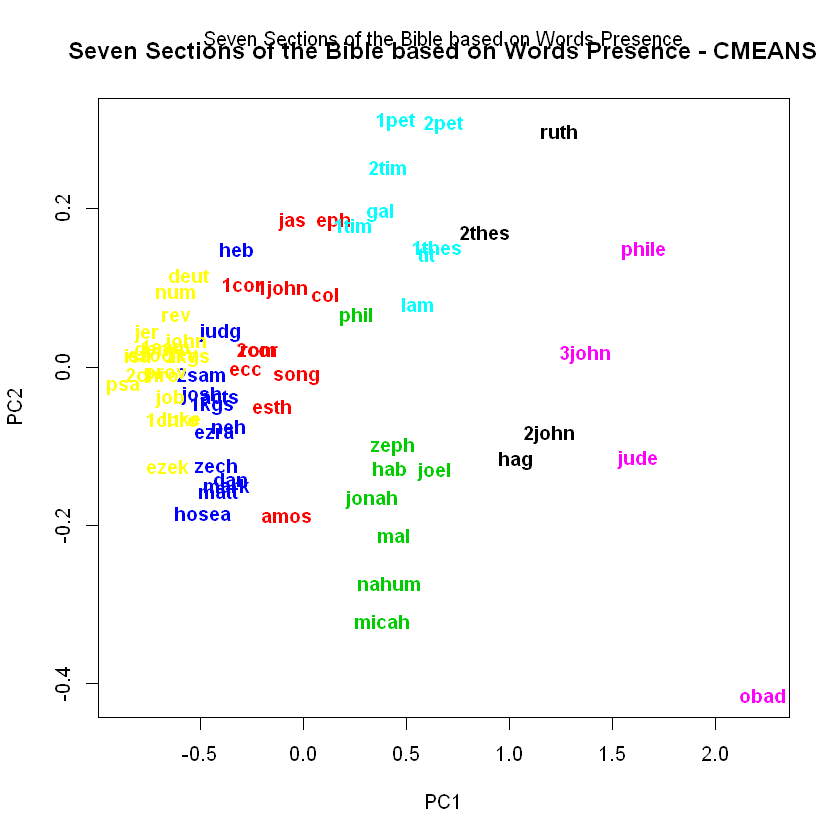

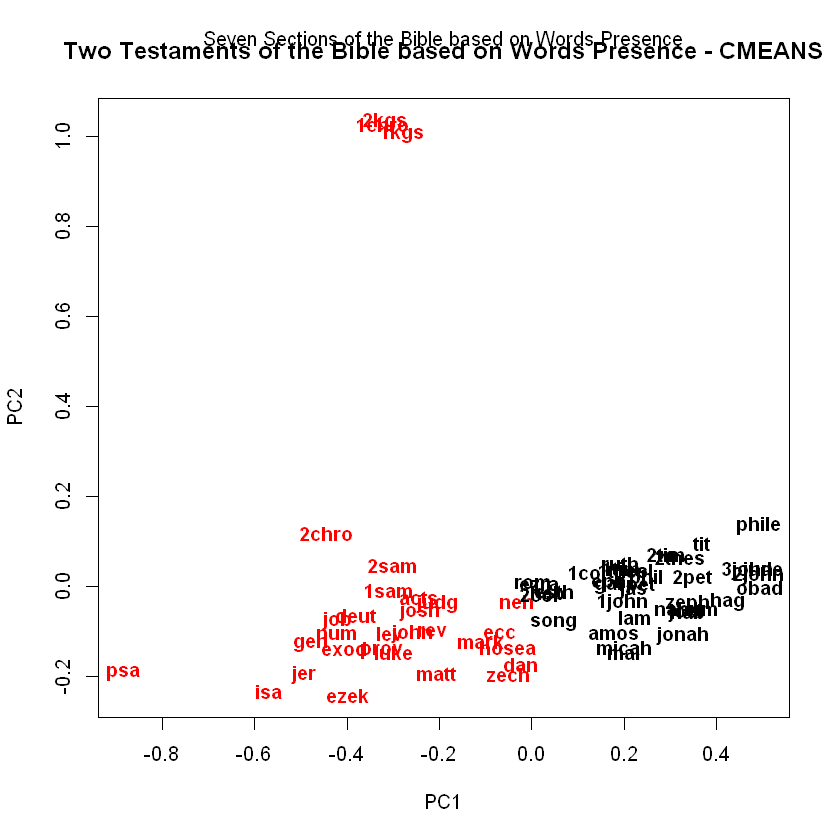

In [32]:
dtm = dtm.ngrams[[km.j]]

csim <- dtm / sqrt(rowSums(dtm*dtm))
csim <- csim %*% t(csim)

dist.mtx <- 1-csim

#PCA plot
fit.pca <- prcomp(as.dist(dist.mtx))
plot(fit.pca$x[,1:2], type='n',main="Seven Sections of the Bible based on Words Presence - CMEANS")
text(x = fit.pca$x[,1], y = fit.pca$x[,2], labels = row.names(fit.pca$x), col=unclass(as.factor(km.best$cluster)), cex=.95, font=2)
mtext( cex = 1, text = "Seven Sections of the Bible based on Words Presence", 
       line=2,
       outer=FALSE)

dtm = dtm.ngrams[[kmT.j]]
## Calculate document-to-document cosine similarity (scalar product)
csim <- dtm / sqrt(rowSums(dtm*dtm))
csim <- csim %*% t(csim)
# Turn that cosine similarity matrix into a distance matrix
dist.mtx <- 1-csim

#PCA plot
fit.pca <- prcomp(as.dist(dist.mtx))
plot(fit.pca$x[,1:2], type='n',main="Two Testaments of the Bible based on Words Presence - CMEANS")
text(x = fit.pca$x[,1], y = fit.pca$x[,2], labels = row.names(fit.pca$x), col=unclass(as.factor(kmT.best$cluster)), cex=.95, font=2)
mtext( cex = 1, text = "Seven Sections of the Bible based on Words Presence", 
       line=2,
       outer=FALSE)

# Gaussian Mixture

In [33]:
mc.sxr.best = 0
mcT.sxr.best = 0
j = 1
for (idf_weight in c(FALSE, TRUE)) {
  for (stemfn_name in c("None", "Porter")){
    for (ngram_length in c(1,3,7)) {
    
      dtm = dtm.ngrams[[j]]
      j = j+1
  
      
      
      csim <- dtm / sqrt(rowSums(dtm*dtm))
      csim <- csim %*% t(csim)
      
      dist.mtx <- 1-csim
    
      set.seed(1234)
      mc=Mclust(as.dist(dist.mtx), 7, verbose=F)
      mcT=Mclust(as.dist(dist.mtx), 2, verbose=F)

      # Calculate success rate
      mc.table = table(mc$classification, as.numeric(ASV_Books$Sections))
      mc.match = solve_LSAP(x = mc.table, maximum = TRUE)
      mc.sxr = sum(mc.table[cbind(seq_along(mc.match), mc.match)]) / sum(mc.table)
      if (mc.sxr > mc.sxr.best) {
        mc.sxr.best = mc.sxr
        mc.best = mc
        mc.j = j-1
      }
      
      mcT.table = table(mcT$classification, as.numeric(ASV_Books$Testaments))
      mcT.match = solve_LSAP(x = mcT.table, maximum = TRUE)
      mcT.sxr = sum(mcT.table[cbind(seq_along(mcT.match), mcT.match)]) / sum(mcT.table)
      if (mcT.sxr > mcT.sxr.best) {
        mcT.sxr.best = mcT.sxr
        mcT.best = mcT
        mcT.j = j-1
      }
      
      cat(sprintf("n-grams: %d    tf-idf: %i    stemming: %s\n", ngram_length, idf_weight, stemfn_name))
      cat(sprintf("Sections:   mclust: %f\n", mc.sxr))
      cat(sprintf("Testaments: mclust: %f\n", mcT.sxr))
    }
  }
}


n-grams: 1    tf-idf: 0    stemming: None
Sections:   mclust: 0.424242
Testaments: mclust: 0.651515
n-grams: 3    tf-idf: 0    stemming: None
Sections:   mclust: 0.454545
Testaments: mclust: 0.651515
n-grams: 7    tf-idf: 0    stemming: None
Sections:   mclust: 0.439394
Testaments: mclust: 0.651515
n-grams: 1    tf-idf: 0    stemming: Porter
Sections:   mclust: 0.378788
Testaments: mclust: 0.651515
n-grams: 3    tf-idf: 0    stemming: Porter
Sections:   mclust: 0.363636
Testaments: mclust: 0.636364
n-grams: 7    tf-idf: 0    stemming: Porter
Sections:   mclust: 0.393939
Testaments: mclust: 0.666667
n-grams: 1    tf-idf: 1    stemming: None
Sections:   mclust: 0.560606
Testaments: mclust: 0.606061
n-grams: 3    tf-idf: 1    stemming: None
Sections:   mclust: 0.469697
Testaments: mclust: 0.606061
n-grams: 7    tf-idf: 1    stemming: None
Sections:   mclust: 0.469697
Testaments: mclust: 0.696970
n-grams: 1    tf-idf: 1    stemming: Porter
Sections:   mclust: 0.530303
Testaments: mclust: 0

Too few points to calculate an ellipse


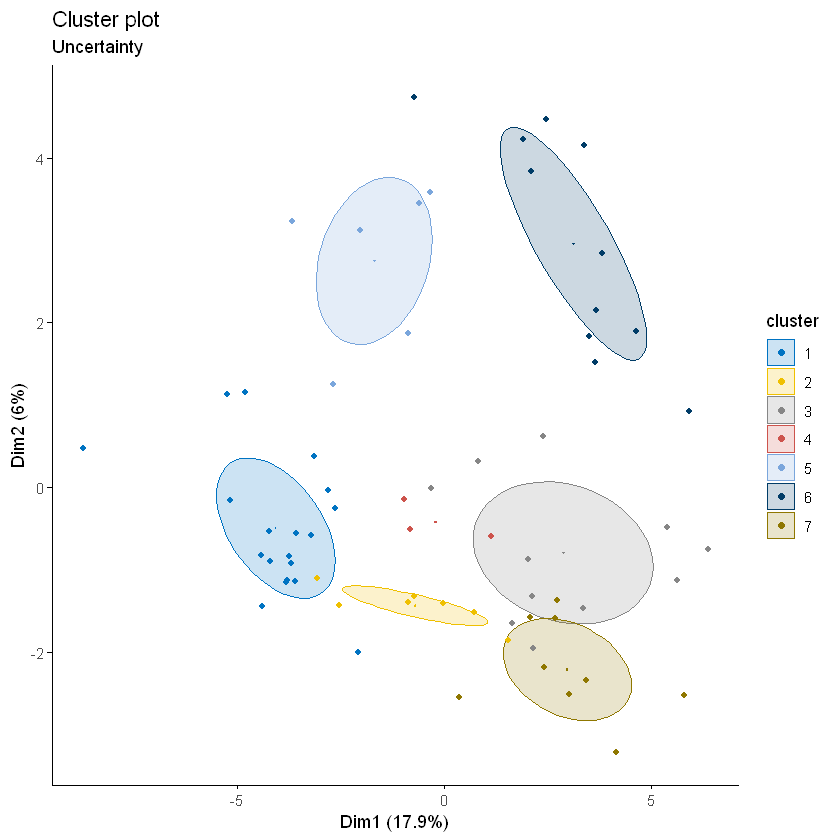

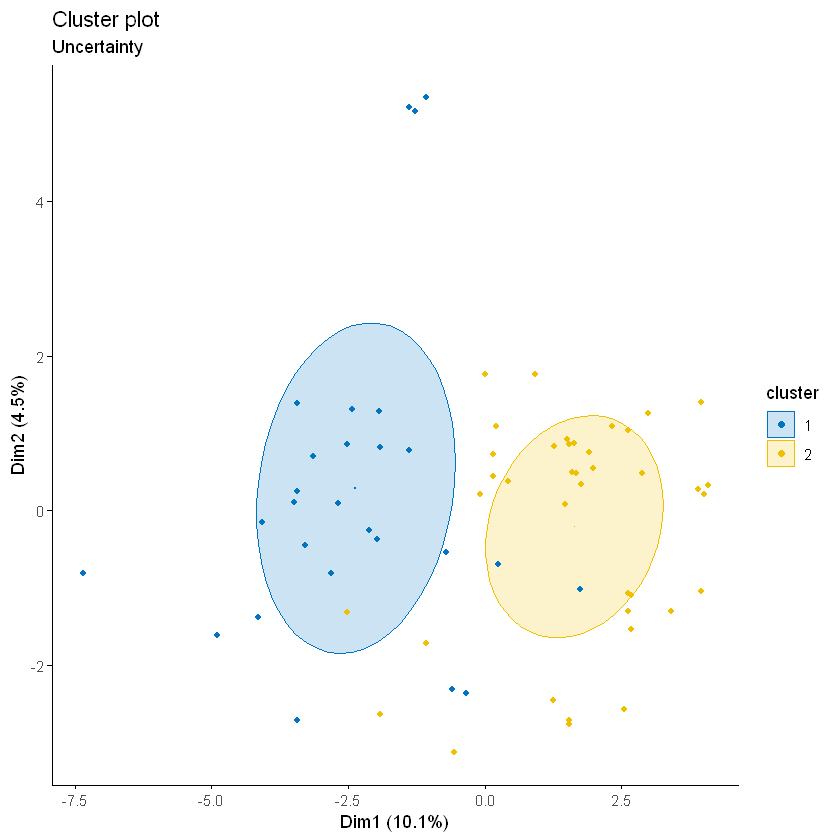

In [34]:
fviz_mclust(mc.best, "uncertainty", palette = "jco")
fviz_mclust(mcT.best, "uncertainty", palette = "jco")